# Análise dos Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfp = pd.read_csv("../data/pessoas_completo_limpo.csv")
dfs = pd.read_csv("../data/sinistros_completo_limpo.csv")
dfv = pd.read_csv("../data/veiculos_completo_limpo.csv")

In [3]:
dfv["ano_sinistro"].value_counts()

2023    243072
2024    233574
2022    225605
2021    220402
2019    209099
2020    196282
2025     88798
2015     10654
2017      9849
2016      9776
2018      6945
2014        11
Name: ano_sinistro, dtype: int64

Como em todos os dataframes há uma quantidade muito menor de registros nos anos entre 2014-2018, e 2025 por ainda estar em andamento, terão seus valores desconsiderados para que a análise seja mais confiável no período estudado

In [4]:
#(dfp["ano_sinistro"] < 2019).sum()
dfp = dfp[(dfp["ano_sinistro"] >= 2019) & (dfp["ano_sinistro"] < 2025)]
dfs = dfs[(dfs["ano_sinistro"] >= 2019) & (dfs["ano_sinistro"] < 2025)]
dfv = dfv[(dfv["ano_sinistro"] >= 2019) & (dfv["ano_sinistro"] < 2025)]

In [5]:
dfp.head()

,id_sinistro,municipio,tipo_via,tipo_veiculo_vitima,sexo,idade,gravidade_lesao,tipo_vitima,faixa_etaria_legal,profissao,ano_sinistro,mes_sinistro,dia_sinistro,ano_obito,mes_obito,dia_obito
16120,1617599,SAO PAULO,RODOVIAS,NaN,FEMININO,23,LEVE,NAO DISPONIVEL,18-24,AUXILIAR DE COZINHA,2019,Janeiro,1,NaN,NaN,NaN
16121,2468144,JALES,RODOVIAS,AUTOMOVEL,MASCULINO,12,FATAL,PASSAGEIRO,0-17,ESTUDANTE,2019,Janeiro,1,2019.0,Janeiro,9.0
16122,1512776,MOGI MIRIM,RODOVIAS,NaN,MASCULINO,20,GRAVE,CONDUTOR,18-24,ADMINISTRADOR(A),2019,Janeiro,1,NaN,NaN,NaN
16123,1681915,SAO PAULO,VIAS MUNICIPAIS,NaN,MASCULINO,11,NAO DISPONIVEL,NAO DISPONIVEL,0-17,DESCONHECIDA,2019,Janeiro,1,NaN,NaN,NaN
16124,1790614,SAO VICENTE,RODOVIAS,NaN,FEMININO,17,LEVE,NAO DISPONIVEL,0-17,ESTUDANTE,2019,Janeiro,1,NaN,NaN,NaN


In [6]:
dfp["tipo_vitima"].value_counts()

NAO DISPONIVEL    641653
CONDUTOR          286562
PEDESTRE            7333
PASSAGEIRO          3800
Name: tipo_vitima, dtype: int64

### Quantidade de acidentes por ano

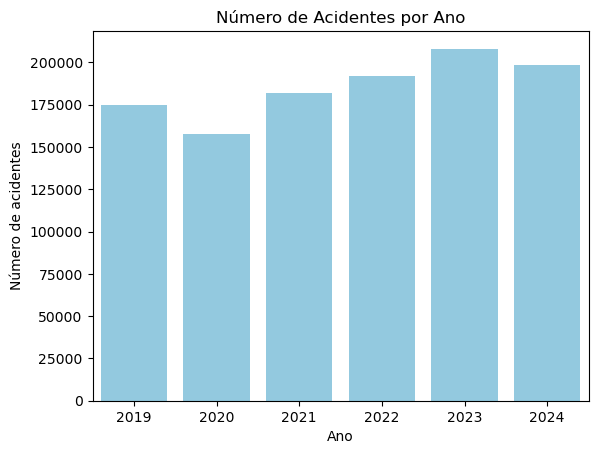

In [7]:
sns.countplot(data=dfs, x="ano_sinistro", color="skyblue")
plt.title("Número de Acidentes por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de acidentes")

plt.show()

Visível no gráfico acima que 2020 foi o ano com menos acidentes entre os mostrados, o que pode ser explicado pela covid que diminuiu drasticamente o tráfego de veículos nas ruas. Outra informação visível é o aumento crescente de acidentes nos últimos anos, que pode ser explicado por uma possível crescente de veículos transitando nas ruas.

### Quantidade de acidentes por hora

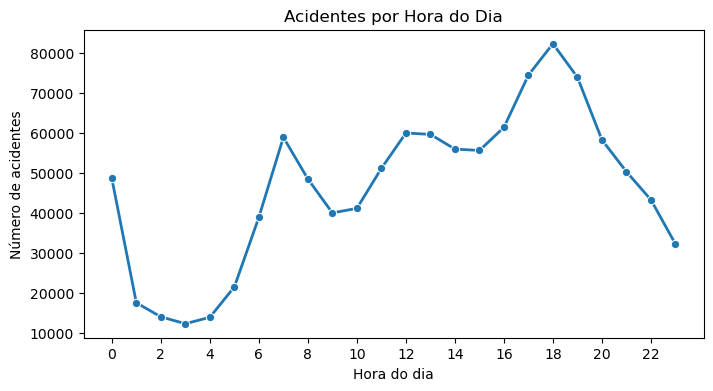

In [8]:
plt.figure(figsize=(8, 4))
accident_hour = dfs["hora_sinistro"].dropna().astype(int).value_counts().sort_index()
sns.lineplot(x=accident_hour.index, y=accident_hour.values, marker="o", linewidth=2)

plt.title("Acidentes por Hora do Dia")
plt.xlabel("Hora do dia")
plt.ylabel("Número de acidentes")
plt.xticks(range(0, 24, 2))

plt.show()

No gráfico de acidentes por hora do dia é possível verificar que os horários com maior quantidade de acidentes é entre as 16h e 20h, justamente o horário de pico de veículos nas ruas, porém também digno de nota a quantidade muito inferior de acidentes no horário de pico da manhã, das 6h às 8h. Mostrando que uma possível causa dos acidentes possa ser o cansaço físico/mental do condutor ao volante.

### Quantidade de envolvidos em acidentes por faixa etária

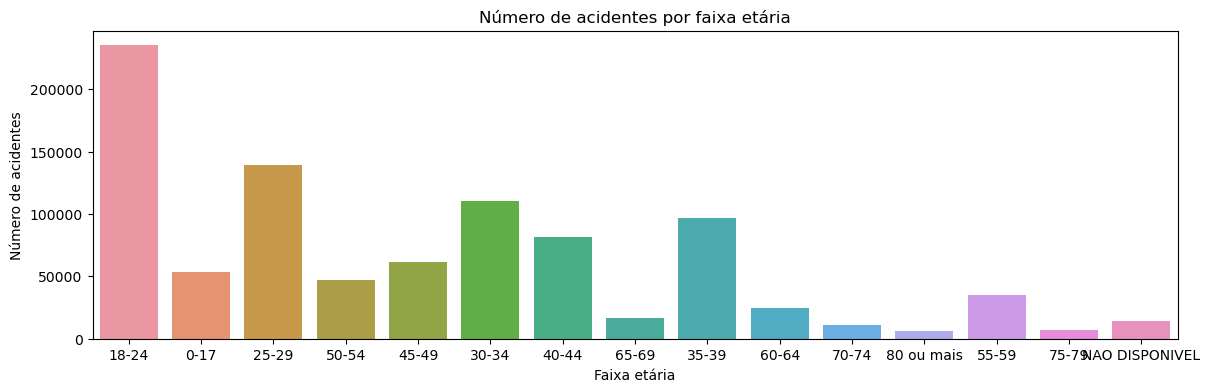

In [9]:
plt.figure(figsize=(14, 4))
sns.countplot(data=dfp, x="faixa_etaria_legal")

plt.title("Número de acidentes por faixa etária")
plt.xlabel("Faixa etária")
plt.ylabel("Número de acidentes")

plt.show()

### Proporção de acidentes por tipo de via

In [10]:
df_ps = pd.merge(dfp, dfs, on="id_sinistro", how="inner")

In [11]:
sns.countplot(data=df_ps, x="tipo_via", hue="gravidade_lesao")

ValueError: Could not interpret input 'tipo_via'